In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

585

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
# Assigning base URL and lists to append and create Dataframe 
base_url = "http://api.openweathermap.org/data/2.5/weather?"
temp_list = []
max_temp = []
wind_speed = []
clouds = []
lng = []
lat = []
humidity = []
country = []
# Printing initial text
print(f""" Beggining Data Retrieval
-----------------------------------
""")
# Creating loop and append every data into lists
for row, city in enumerate(cities):
    endpoint = f"{base_url}appid={weather_api_key}&q={city}&units=metric"
    try:
        req = requests.get(endpoint).json()
        city_name = req["name"]
        city_id = req["weather"][0]["id"]
        country.append(req["sys"]["country"])
        temp_list.append(req["main"]["temp"])
        max_temp.append(req["main"]["temp_max"])
        wind_speed.append(req["wind"]["speed"])
        clouds.append(req["clouds"]["all"])
        humidity.append(req["main"]["humidity"])
        lng.append(req["coord"]["lon"])
        lat.append(req["coord"]["lat"])
        print(f"Processing record {row + 1} of City ID {city_id} | {city_name}")
    except:
        country.append("Not Found")
        temp_list.append("Not Found")
        max_temp.append("Not Found")
        wind_speed.append("Not Found")
        clouds.append("Not Found")
        humidity.append("Not Found")
        lng.append("Not Found")
        lat.append("Not Found")
        print(f"{city_name} not found... Skipping")
        
print(f"""
-----------------------------------
Data Retrieval Complete
-----------------------------------""")


 Beggining Data Retrieval
-----------------------------------

Processing record 1 of City ID 803 | Vila Franca do Campo
Processing record 2 of City ID 802 | Norman Wells
Processing record 3 of City ID 800 | Sabha
Processing record 4 of City ID 802 | Birao
Processing record 5 of City ID 804 | Rikitea
Processing record 6 of City ID 804 | Ballina
Processing record 7 of City ID 800 | Upernavik
Processing record 8 of City ID 801 | Bluff
Processing record 9 of City ID 800 | Salisbury
Processing record 10 of City ID 600 | La Ronge
La Ronge not found... Skipping
Processing record 12 of City ID 803 | Hong Kong
Processing record 13 of City ID 800 | Punta Arenas
Punta Arenas not found... Skipping
Processing record 15 of City ID 804 | Qaanaaq
Processing record 16 of City ID 802 | Port Alfred
Port Alfred not found... Skipping
Processing record 18 of City ID 501 | Jamestown
Jamestown not found... Skipping
Processing record 20 of City ID 803 | Khatanga
Processing record 21 of City ID 501 | Cidreira


Processing record 176 of City ID 803 | Morgan City
Processing record 177 of City ID 800 | San Quintín
Processing record 178 of City ID 802 | Klyuchi
Processing record 179 of City ID 800 | Saint George
Processing record 180 of City ID 800 | Souillac
Processing record 181 of City ID 802 | Shimoda
Processing record 182 of City ID 802 | Camaçari
Processing record 183 of City ID 804 | Saskylakh
Saskylakh not found... Skipping
Processing record 185 of City ID 804 | Colares
Colares not found... Skipping
Processing record 187 of City ID 800 | Beloha
Processing record 188 of City ID 801 | Mananjary
Processing record 189 of City ID 800 | Jalingo
Processing record 190 of City ID 803 | Hay River
Processing record 191 of City ID 804 | Chui
Processing record 192 of City ID 804 | Kaili
Kaili not found... Skipping
Processing record 194 of City ID 804 | Husavik
Processing record 195 of City ID 800 | Eqbālīyeh
Processing record 196 of City ID 801 | Clyde River
Processing record 197 of City ID 800 | Drac

Processing record 352 of City ID 804 | Luan
Processing record 353 of City ID 800 | Nānākuli
Processing record 354 of City ID 804 | Grandview
Processing record 355 of City ID 804 | Peniche
Processing record 356 of City ID 803 | Gravdal
Processing record 357 of City ID 803 | Kloulklubed
Processing record 358 of City ID 804 | Sioux Lookout
Sioux Lookout not found... Skipping
Processing record 360 of City ID 804 | São Gabriel da Cachoeira
São Gabriel da Cachoeira not found... Skipping
Processing record 362 of City ID 802 | Miramar
Processing record 363 of City ID 804 | Ol'ga
Processing record 364 of City ID 802 | Taksimo
Processing record 365 of City ID 802 | Kieta
Processing record 366 of City ID 800 | Khasan
Processing record 367 of City ID 804 | Middlebury (village)
Processing record 368 of City ID 500 | San Jerónimo
Processing record 369 of City ID 803 | Manjakandriana
Processing record 370 of City ID 803 | Ilulissat
Processing record 371 of City ID 803 | College
Processing record 372 

Processing record 527 of City ID 800 | Ati
Processing record 528 of City ID 802 | Seymchan
Processing record 529 of City ID 804 | San Miguel
Processing record 530 of City ID 803 | Pochutla
Processing record 531 of City ID 803 | Esperance
Processing record 532 of City ID 803 | Camacupa
Camacupa not found... Skipping
Processing record 534 of City ID 800 | Bushehr
Processing record 535 of City ID 501 | Conceição do Araguaia
Processing record 536 of City ID 804 | Formosa do Rio Preto
Processing record 537 of City ID 804 | Magistral'nyy
Processing record 538 of City ID 804 | Laje
Processing record 539 of City ID 800 | Adré
Processing record 540 of City ID 804 | Davidson
Processing record 541 of City ID 800 | Ardeşen
Processing record 542 of City ID 802 | Kailua
Processing record 543 of City ID 802 | Yoichi
Processing record 544 of City ID 804 | Mt. Pleasant
Processing record 545 of City ID 804 | North Vernon
Processing record 546 of City ID 802 | Thinadhoo
Processing record 547 of City ID 8

In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
endpoint = f"{base_url}appid={weather_api_key}&q=mataura&units=metric"
requests.get(endpoint).json()["sys"]["country"]

'NZ'

In [5]:
weather_df = pd.DataFrame({"Country":country,
                           "City":cities,
                          "Temperature":temp_list,
                          "Max Temperature":max_temp,
                          "Wind Speed":wind_speed,
                          "Cloudiness":clouds,
                           "Humidity":humidity,
                          "Latitude":lat,
                          "Longitude":lng})
weather_df.head()

,Country,City,Temperature,Max Temperature,Wind Speed,Cloudiness,Humidity,Latitude,Longitude
0,PT,vila franca do campo,18,18,2.6,75,59,37.72,-25.43
1,CA,norman wells,-7,-7,2.1,40,79,65.28,-126.83
2,LY,sabha,21.55,21.55,4.01,0,23,27.04,14.43
3,CF,birao,23.87,23.87,1.67,32,49,10.28,22.79
4,PF,rikitea,24.2,24.2,7.49,100,83,-23.12,-134.97


In [6]:
### Save Results on csv file
weather_df.to_csv("output_data/temperature_by_city.csv")

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
cities_df = pd.read_csv(output_data_file)
cities_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


In [8]:
# Converting UNIX date values to date type value
date_conversion = pd.to_datetime(cities_df["Date"], unit='s').dt.date
cities_df["Date"] = date_conversion
cities_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,2019-05-20,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,2019-05-20,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,2019-05-20,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,2019-05-20,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,2019-05-20,76,-33.93,18.42,55.99,8.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

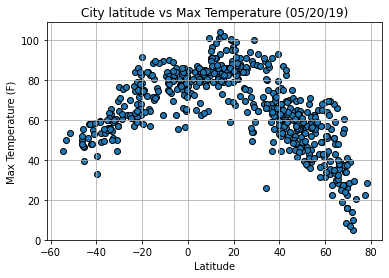

In [9]:
plt.scatter(cities_df["Lat"],cities_df["Max Temp"], edgecolors="black")
plt.title("City latitude vs Max Temperature (05/20/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("output_data/Fig1.png")
plt.show()


#### Latitude vs. Humidity Plot

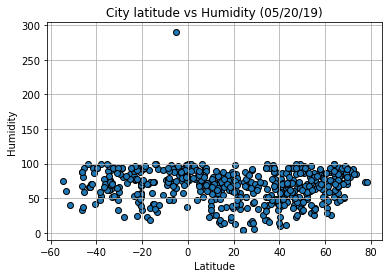

In [10]:
plt.scatter(cities_df["Lat"],cities_df["Humidity"], edgecolors="black")
plt.title("City latitude vs Humidity (05/20/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.savefig("output_data/Fig2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

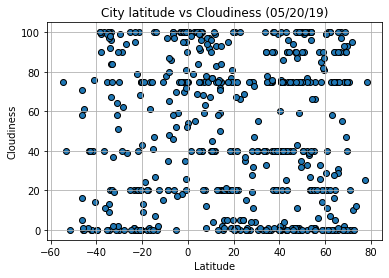

In [11]:
plt.scatter(cities_df["Lat"],cities_df["Cloudiness"], edgecolors="black")
plt.title("City latitude vs Cloudiness (05/20/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.savefig("output_data/Fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

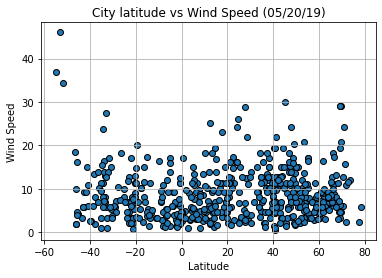

In [12]:
plt.scatter(cities_df["Lat"],cities_df["Wind Speed"], edgecolors="black")
plt.title("City latitude vs Wind Speed (05/20/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.savefig("output_data/Fig4.png")
plt.show()

In [13]:
# Adding hemisphere column considering northern has latitude greater than or equal to 0
hemisphere = []
for x in cities_df["Lat"]:
    if x>=0:
        hemisphere.append("Northern Hemisphere")
    else:
        hemisphere.append("Southern Hemisphere")
        
cities_df["Hemisphere"] = hemisphere
cities_df.head()
        

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Hemisphere
0,0,ostrovnoy,2,RU,2019-05-20,72,68.05,39.51,37.50,7.16,Northern Hemisphere
1,1,mahebourg,75,MU,2019-05-20,74,-20.41,57.70,78.80,11.41,Southern Hemisphere
2,2,qaanaaq,25,GL,2019-05-20,73,77.48,-69.36,22.20,2.37,Northern Hemisphere
3,3,zhuhai,0,CN,2019-05-20,39,40.71,112.04,44.60,4.47,Northern Hemisphere
4,4,cape town,20,ZA,2019-05-20,76,-33.93,18.42,55.99,8.05,Southern Hemisphere


## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_reg(hemisphere,yvalue,x_coord,y_coord):
    x_values = hemisphere["Lat"]
    y_values = hemisphere[yvalue]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_coord,y_coord),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f"{yvalue}")
    plt.title (f"Latitude vs {yvalue} Linear Regression")
    plt.savefig(f"output_data/{hemisphere['Hemisphere'][0]} - Latitude vs {yvalue} linregress.png")
    return plt.show()

In [15]:
# Create Northern and Southern Hemisphere DataFrames
northern = cities_df.loc[cities_df["Hemisphere"] == "Northern Hemisphere"]
southern = cities_df.loc[cities_df["Hemisphere"] == "Southern Hemisphere"]

In [16]:
northern = northern.reset_index(drop=True)
northern.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Hemisphere
0,0,ostrovnoy,2,RU,2019-05-20,72,68.05,39.51,37.50,7.16,Northern Hemisphere
1,2,qaanaaq,25,GL,2019-05-20,73,77.48,-69.36,22.20,2.37,Northern Hemisphere
2,3,zhuhai,0,CN,2019-05-20,39,40.71,112.04,44.60,4.47,Northern Hemisphere
3,8,tiksi,95,RU,2019-05-20,88,71.64,128.87,14.10,15.70,Northern Hemisphere
4,9,pushkinskiye gory,6,RU,2019-05-20,70,57.02,28.91,65.04,6.93,Northern Hemisphere


In [17]:
southern = southern.reset_index(drop=True)
southern.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Hemisphere
0,1,mahebourg,75,MU,2019-05-20,74,-20.41,57.70,78.80,11.41,Southern Hemisphere
1,4,cape town,20,ZA,2019-05-20,76,-33.93,18.42,55.99,8.05,Southern Hemisphere
2,5,atuona,78,PF,2019-05-20,76,-9.80,-139.03,81.96,16.49,Southern Hemisphere
3,6,flinders,0,AU,2019-05-20,62,-34.58,150.85,60.01,11.41,Southern Hemisphere
4,7,opuwo,0,NaN,2019-05-20,23,-18.06,13.84,72.06,5.44,Southern Hemisphere


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

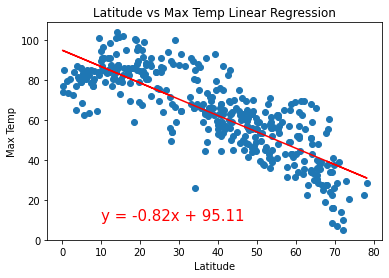

In [18]:
linear_reg(northern,"Max Temp",10,10)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

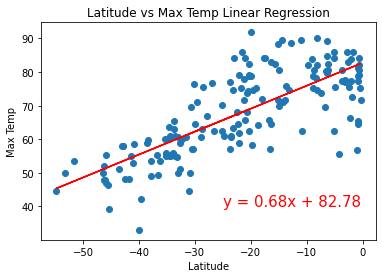

In [19]:
linear_reg(southern,"Max Temp",-25,40)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

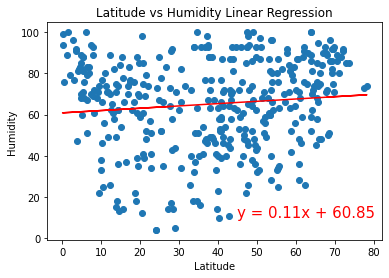

In [20]:
linear_reg(northern,"Humidity",45,10)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

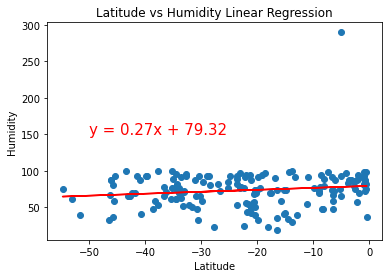

In [21]:
linear_reg(southern,"Humidity",-50,150)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression


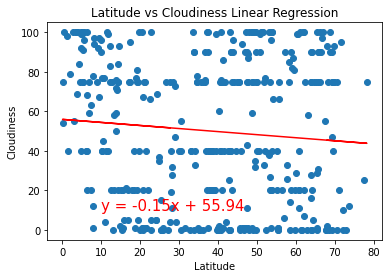

In [22]:
linear_reg(northern,"Cloudiness",10,10)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

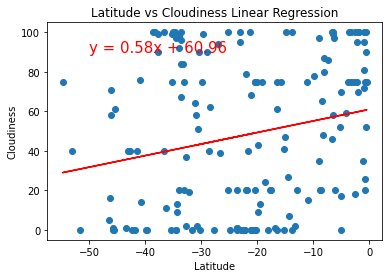

In [23]:
linear_reg(southern,"Cloudiness",-50,90)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression


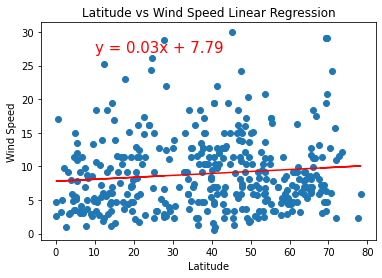

In [24]:
linear_reg(northern,"Wind Speed",10,27)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

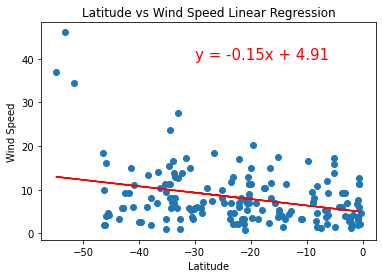

In [25]:
linear_reg(southern,"Wind Speed",-30,40)